## ST451 Final Project Code: Online News Topics and Article Shares
### Candidate Number: 41294

# Table of Contents
1. [Regression Problem](#Regression)
    1. [Ridge Regression](#RidgeRegression)
    2. [Lasso](#Lasso)
    3. [K-Nearest Neighbors](#knn)
    4. [Regression with Random Forest](#rrf)
    5. [Bayesian Linear Regression](#blr)
    6. [Bayesian Ridge Regression](#brr)
2. [Classification Problem](#classification)
    1. [Multi-class Logistic Regression for Category](#mc)
    2. [Bayesian Logistic Regression for High Shares](#blrhs)
    3. [Logistic Regression for High Shares](#lrhs)
    4. [Bayesian Logistic Regression for Is Business](#blrb)
    5. [Logistic Regression for Is Business](#lrb)
    6. [Bayesian Logistic Regression for Is Weekend](#blrw)
    7. [Logistic Regression for Is Weekend](#lrw)
    8. [Bayesian Logistic Regression for Is Entertainment](#blre)
    9. [Logistic Regression for Is Entertainment](#lre)
3. [References](#ref)

In [91]:
#loading necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score, mean_squared_error 
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
#reading data in
onp=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
#examining all columns and first few rows of data
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
#finding median shares in order to create split data into the binary categorical variable high shares
onp[' shares'].median()
#median of shares is 1400

1400.0

In [8]:
#function to determine level of shares
def lev(row):
    if row[' shares']>=1400:
        t=1
    else:
        t=0
    return t

#function to determine article type
def cat(row):
    if row[' data_channel_is_lifestyle']==1:
        t=0
    elif row[' data_channel_is_entertainment']==1:
        t=1
    elif row[' data_channel_is_bus']==1:
        t=2
    elif row[' data_channel_is_socmed']==1:
        t=3
    elif row[' data_channel_is_tech']==1:
        t=4
    else:
        t=5
    return t    

In [9]:
#adding values for level of shares
onp['high_shares']=onp.apply(lev, axis=1)
onp['category']=onp.apply(cat, axis=1)

In [10]:
#examining all columns and first few rows of data with two new columns
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares,category
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,2
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,2
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,4


In [90]:
print("Total Articles: %i" %len(onp['high_shares']))
print("Number of High Share Articles: %i" %onp['high_shares'].sum())

Total Articles: 39644
Number of High Share Articles: 21154


# Regression <a name='Regression'></a>

In [11]:
#create a constant x0 term for regressions
n = len(onp['category'])
onp['x0'] = np.ones(n)

In [77]:
#creating predictors for Linear Regression
predictors = ['x0',' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' data_channel_is_lifestyle',
             ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech',
             ' is_weekend', ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']

#defining target variable
target = [' shares']

#splitting the data 70/30 into training and testing 
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], onp[target],
                        test_size=0.30, random_state=1)

In [78]:
#MLE on Training Data
#X = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     12.76
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.58e-32
Time:                        21:04:52   Log-Likelihood:            -2.9902e+05
No. Observations:               27750   AIC:                         5.981e+05
Df Residuals:                   27734   BIC:                         5.982e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
x0                              1236.5253    463.020      2.671      0.008     328.983    2144.067
 n_tokens_title                   69.7121     33.709      2.068      0.039       3.641     135.784
 n_tokens_content                 -0.8140      0.170     -4.798      0.000      -1.146      -0.481
 num_hrefs                        37.4787      7.107      5.274      0.000      23.549      51.409
 num_imgs                         51.5454      9.444      5.458      0.000      33.036      70.055
 num_videos                       60.5894     17.397      3.483      0.000      26.490      94.689
 data_channel_is_lifestyle      -534.3684    326.213     -1.638      0.101   -1173.762     105.025
 data_channel_is_entertainment -1013.7775    204.950     -4.946      0.000   -1415.490    -612.065
 data_channel_is_bus            -498.6972    216.448     -2.304      0.021    -922.947     -74.448
 data_channel_is_socmed         -173.6466    311.309     -0.558      0.577    -783.828     436.535
 data_channel_is_tech           -737.1379    204.977     -3.596      0.000   -1138.902    -335.373
 is_weekend                      583.9893    207.286      2.817      0.005     177.699     990.280
 global_subjectivity            3215.0665    656.066      4.901      0.000    1929.144    4500.989
 global_sentiment_polarity      -464.2582    807.651     -0.575      0.565   -2047.295    1118.779
 title_subjectivity              438.4624    224.904      1.950      0.051      -2.360     879.284
 title_sentiment_polarity        335.7733    280.006      1.199      0.230    -213.052     884.599
==============================================================================
Omnibus:                    78141.583   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5267191576.705
Skew:                          36.896   Prob(JB):                         0.00
Kurtosis:                    2136.064   Cond. No.                     9.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ridge Regression <a name='RidgeRegression'></a>

In [87]:
#CV Ridge Regression with full dataset

#creating predictors for Linear Regression
predictors = ['x0',' n_tokens_title', 
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' is_weekend',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' title_subjectivity',
 ' title_sentiment_polarity']
 
#defining target variable
target = [' shares']

#splitting the data into training and testing and standardizing the coefficients for ridge regression
x_train, x_test, y_train, y_test = train_test_split(preprocessing.scale(onp[predictors]), np.ravel(onp[target]),
                        test_size=0.30, random_state=1)

alphas=10**np.linspace(10,-2,100)*0.5 #From Reference 1

r_lin = RidgeCV(alphas=alphas, scoring = 'neg_mean_squared_error').fit(x_train, y_train) #default is cv=3
print("Tuning Parameter: %f" %r_lin.alpha_)
pred = r_lin.predict(x_train)
print("Training MSE: %f" % mean_squared_error(y_train, pred))
print("Testing MSE: %f" % mean_squared_error(y_test, r_lin.predict(x_test)))

Tuning Parameter: 814.875417
Training MSE: 133424217.258818
Testing MSE: 135380489.846532


## Lasso <a name='Lasso'></a>

In [88]:
#with Lasso 
lasso = LassoCV(alphas=alphas, cv=3).fit(x_train, y_train)
print("Tuning Parameter: %f" %lasso.alpha_)
lasso.score(x_train, y_train)
pred = lasso.predict(x_train)
print("Training MSE: %f" % mean_squared_error(y_train, pred))
print("Testing MSE: %f" % mean_squared_error(y_test, lasso.predict(x_test)))
#CITE http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html for alphas

Tuning Parameter: 12.385382
Training MSE: 133424326.663199
Testing MSE: 135364882.449688


## K-Nearest Neighbors <a name='knn'></a>

In [53]:
##K nearest neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [51]:
#finding the ideal k from list of possible ks
params = {'n_neighbors':[2,3,4,5,100,500,1000,5000,10000]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 1000}

In [83]:
#fitting kNN with k=1000 and assigning uniform weights to the nearby points
knn=KNeighborsRegressor(n_neighbors=1000, weights='uniform')
k=knn.fit(x_train, y_train)
pred = k.predict(x_train)
print("Training MSE: %f" % mean_squared_error(y_train, pred))
print("Test MSE: %f" % mean_squared_error(y_test, k.predict(x_test)))

Training MSE: 134022767.689483
Test MSE: 135741769.720349


## Regression with Random Forest <a name='rrf'></a>

In [100]:
#running random forest with 900 decision trees
randomF=RandomForestRegressor(n_estimators=900, random_state=123, oob_score=True)

#training the model
rF=randomF.fit(x_train, y_train)

pred=rF.predict(x_train)
print("Out of Bag Score: %f" %rF.oob_score_)
print("Training MSE: %f" % mean_squared_error(y_train, pred))
print("Test MSE: %f" % mean_squared_error(y_test, rF.predict(x_test)))

Out of Bag Score: -0.116698
Training MSE: 20592782.031242
Test MSE: 142792545.894577


## Bayesian Linear Regression <a name='blr'></a>

In [82]:
# function for Bayesian Linear regression, return posterior mean and 95% CIs
def BLR(X,y,mu_0,Om_0_inv,a_0,b_0,ind_names,N):
    col_names = ['posterior mean','lower 95% bound','upper 95% bound']
    n,p = X.shape
    XtX = X.T.dot(X)
    Om_n_inv = XtX + Om_0_inv
    Om_n = sc.linalg.inv(Om_n_inv)
    term1 = Om_0_inv.dot(mu_0)+X.T.dot(y)
    mu_n = Om_n.dot(term1)
    a_n = a_0 + n/2
    term2 = y.T.dot(y)+mu_0.dot(Om_0_inv.dot(mu_0))+mu_n.dot(Om_n_inv.dot(mu_n))
    b_n = b_0 + term2/2
    sigma2 = 1/np.random.gamma(a_n, 1/b_n, N)
    betas = np.zeros((N,p))
    # draw N samples from the marginal posterior of beta
    for i in range(0,N):
        s2 =sigma2[i]
        cov = s2*Om_n
        betas[i,] = np.random.multivariate_normal(mu_n,cov,1)

    #find the mean of each column which corresponds to each beta coefficient     
    mu_beta = np.mean(betas, axis=0)
    #find the 2.5 and 97.5 percentiles which correspond to each beta coefficient 
    lower95 = np.percentile(betas,2.5,axis=0)
    upper95 = np.percentile(betas,97.5,axis=0)
    results = np.column_stack([mu_beta,lower95,upper95])
    results = pd.DataFrame(results,columns = col_names,index=ind_names)
    return results, mu_n, Om_n, a_n, b_n

In [83]:
##Bayesian Linear Regression

#setting up X and Y
X = x_train
y = y_train.iloc[:,0]
n,p = X.shape

#setting up priors
mu_0 = np.zeros(p)
XtX = X.T.dot(X)
Om_0_inv = XtX/n #using the unit information prior
a_0 = 0.01
b_0 = 0.01

#setting the Monte Carlo sample size
N=10000

results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
results

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: covariance is not symmetric positive-semidefinite.


,posterior mean,lower 95% bound,upper 95% bound
x0,9.851341e+27,-1.313182e+30,1.328559e+30
n_tokens_title,-5.232302e+17,-2.607104e+20,2.654448e+20
num_keywords,-1.561476e+17,-1.292901e+20,1.276971e+20
data_channel_is_lifestyle,-1.249100e+18,-1.034310e+21,1.021561e+21
data_channel_is_entertainment,1.036196e+19,-5.336172e+21,5.260787e+21
data_channel_is_bus,3.141642e+18,-1.725142e+21,1.724558e+21
data_channel_is_socmed,-1.659181e+19,-8.636507e+21,8.657686e+21
data_channel_is_tech,-5.952157e+18,-2.927562e+21,2.991285e+21
self_reference_avg_sharess,8.880777e+15,-4.277186e+18,4.146767e+18
weekday_is_monday,-9.851341e+27,-1.328559e+30,1.313182e+30


## Bayesian Ridge Regression <a name='brr'></a>

In [84]:
bayes_r = BayesianRidge(compute_score=True)
bayes_r.fit(x_train, y_train)
#beta = [bayes_r.intercept_]
beta = (bayes_r.coef_)
beta

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.00000000e+00,  4.06123680e-05,  8.47519268e-05,  2.57321608e-07,
       -1.22022981e-05, -1.16004859e-05,  2.63582790e-06, -1.72371567e-05,
        3.11605355e-02,  1.36822708e-05, -1.35644705e-05, -4.17371898e-06,
       -9.96924582e-06, -3.24947353e-06,  1.72746380e-05,  8.94406817e-06,
        1.63080968e-06,  1.48639199e-07,  1.37831704e-07, -4.27921577e-06,
       -3.00792325e-06,  1.75315949e-05,  7.69531129e-06])

In [85]:
X = x_train
y = y_train.iloc[:,0]
n,p = X.shape
XtX = X.T.dot(X) #X.T give X transpose X.dot(b) does matrix multiplication X*b
XtX_inv = sc.linalg.inv(XtX) #sc.linalg.inv(A) provide the inverse of A
e = y - X.dot(beta)
sigma2_hat = e.T.dot(e)/(n-p)
var_beta = sigma2_hat*(XtX_inv)
sigma2_hat, var_beta, np.diag(var_beta)

(144636688.41206428, array([[-3.97574302e+19, -2.37209830e+04, -1.55523173e+04,
         -9.76393122e+03, -5.96070111e+03, -6.73469435e+04,
         -6.23472053e+04, -3.21662753e+04,  9.39519170e-01,
          3.97574302e+19,  3.97574302e+19,  3.97574302e+19,
          3.97574302e+19,  3.97574302e+19,  3.97574302e+19,
         -1.02383926e+06, -5.79332439e+04, -2.54825697e+06,
          3.92740679e+06,  8.43066635e+05,  2.81257204e+05,
          1.91554516e+04,  2.26914933e+03],
        [-9.32504556e+03,  1.22131624e+03, -8.40352060e+00,
          7.50796125e+02, -7.11831687e+02,  1.24940473e+02,
          9.10867545e+02,  2.56504660e+02, -6.95541494e-04,
         -3.67926443e+03, -3.68256972e+03, -3.69438155e+03,
         -3.56650012e+03, -3.63756071e+03, -3.60086933e+03,
          1.11579966e+03,  8.73088758e+02,  4.68591486e+03,
          7.59967210e+02, -4.10039924e+02, -1.09675505e+02,
         -6.46367558e+02, -2.17942272e+01],
        [ 1.68767941e+03, -8.40352060e+00,  1.565871

In [86]:
#calculate 95% CI for beta and present output via a pandas data frame 
tval = sc.stats.t.ppf(0.975,n-p)
std_beta = np.sqrt(np.diag(var_beta))
lower95 = beta - tval*std_beta
upper95 = beta + tval*std_beta
results = np.column_stack([beta,std_beta,lower95,upper95])
col = ['coefficient','se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


,coefficient,se,lower 95% bound,upper 95% bound
x0,0.000000e+00,NaN,NaN,NaN
n_tokens_title,4.061237e-05,34.947335,-68.498468,68.498549
num_keywords,8.475193e-05,39.571093,-77.561218,77.561388
data_channel_is_lifestyle,2.573216e-07,339.263735,-664.973730,664.973730
data_channel_is_entertainment,-1.220230e-05,213.199219,-417.881044,417.881020
data_channel_is_bus,-1.160049e-05,228.659708,-448.184369,448.184346
data_channel_is_socmed,2.635828e-06,328.037716,-642.970173,642.970178
data_channel_is_tech,-1.723716e-05,213.074565,-417.636721,417.636687
self_reference_avg_sharess,3.116054e-02,0.003053,0.025176,0.037145
weekday_is_monday,1.368227e-05,NaN,NaN,NaN


# Classification <a name='classification'></a>

In [ ]:
##Classification

In [57]:
def sigma(x,beta):
    xbeta = x.dot(beta)
    d = 1. + np.exp(-xbeta)
    return d**(-1)

##Laplace Approximation (though variational Bayes may be preferred?)

#functions needed for Laplace
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+(1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t

def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T @ S0 @ (beta-m0)
    return  nll(beta, x, y) -  logprior

def neg_post_prime(beta, x, y, m0, S0):
    return  x.T.dot(sigma(x,beta)-y)+S0.dot(beta-m0)
def laplace_prec(beta, x, S0):
    n = x.shape[0]  
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    prec = S0.values + x.T.dot(S.dot(x))    
    return prec
def NewtonRaphsonBayesLogReg(beta0,x,y,m0,S0,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log Posterior ',NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        H_inv = sc.linalg.inv(H) 
        beta = beta - H_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new-NegLogPost)
        NegLogPost = NegLogPost_new
    if (iter == maxiter):
        print('Did not Converge') 
    return beta, H_inv


## Multi-class Logistic Regression for Category <a name='mc'></a>

In [14]:

#multiclass logistic regression for category
target = ['category']
n = len(onp[target])
onp['x0'] = np.ones(n)
predictors = ['x0', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', 
              ' num_videos', ' global_subjectivity', ' global_sentiment_polarity', 
              ' title_subjectivity', ' title_sentiment_polarity', ' is_weekend']

#splitting into testting and training
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], np.ravel(onp[target]),
                        test_size=0.30, random_state=1)

#performing multiclass logistic regression, with multinomial specification
multi_class=LogisticRegression(solver='lbfgs', max_iter=20000, multi_class='multinomial')
multi_class.fit(x_train, y_train)
print("Training Score: %f" %multi_class.score(x_train, y_train))



Training Score: 0.389153


## Bayesian Logistic Regression for High Shares <a name='blrhs'></a>

In [58]:
#now Bayesian logistic regression for level of article shares
target = ['high_shares']
n = len(onp[target])
onp['x0'] = np.ones(n)
predictors = ['x0', ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], onp[target],
                        test_size=0.30, random_state=1)
n,p = x_train.shape

#finding the betas
n,p = x_train.shape
m0 = np.zeros(p)
S0 = x_train.T.dot(x_train)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,x_train, y_train['high_shares'],
                                                  m0,S0,maxiter,tolerance)

#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['x0', ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
results = pd.DataFrame(results,columns = col,index=ind)
results

iteration  1  Negative Log Posterior  19234.834260538522  AbDiff  1
iteration  2  Negative Log Posterior  18472.348880875532  AbDiff  762.4853796629905
iteration  3  Negative Log Posterior  18467.223658031  AbDiff  5.12522284453371
iteration  4  Negative Log Posterior  18467.21933089717  AbDiff  0.004327133829065133


,post mean,post se,lower 95% bound,upper 95% bound
x0,-0.433330,0.081797,-0.593653,-0.273007
data_channel_is_entertainment,-0.425876,0.035593,-0.495639,-0.356113
data_channel_is_bus,0.184693,0.036754,0.112656,0.256730
data_channel_is_socmed,1.081371,0.060926,0.961956,1.200787
data_channel_is_tech,0.591693,0.035645,0.521829,0.661557
n_tokens_title,-0.009812,0.005974,-0.021522,0.001898
n_tokens_content,-0.000095,0.000031,-0.000155,-0.000035
num_hrefs,0.014082,0.001386,0.011365,0.016800
num_imgs,0.015364,0.001739,0.011955,0.018773
num_videos,0.011649,0.003155,0.005465,0.017833


2              0.0
3              0.0
8              0.0
11             0.0
19             0.0
21             0.0
22             0.0
23             0.0
24             0.0
25             0.0
33             0.0
36             0.0
37             0.0
38             0.0
40             0.0
44             0.0
45             0.0
54             0.0
56             0.0
57             0.0
65             0.0
66             0.0
67             0.0
69             0.0
72             0.0
74             0.0
84             0.0
85             0.0
88             0.0
92             0.0
              ... 
39546          0.0
39548          0.0
39551          0.0
39552          0.0
39557          0.0
39558          0.0
39561          0.0
39562          0.0
39565          0.0
39569          0.0
39571          0.0
39584          0.0
39585          0.0
39588          0.0
39589          0.0
39591          0.0
39592          0.0
39593          0.0
39603          0.0
39607          0.0
39616          0.0
39622       

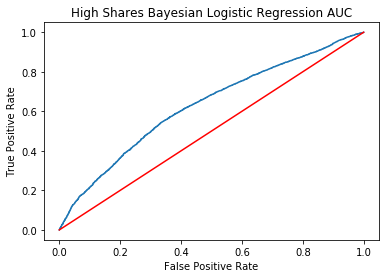

In [23]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xt = x_test.values[0,]
#print(np.mean(Xt.dot(betas.T)))
Xbetas = x_test.dot(betas.T)
test = np.mean(Xbetas, axis=1)
test.head()

#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)

#Evaluate predictive performance of Bayesian Logistic Regression
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test)/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
plt.title('High Shares Bayesian Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('high_shares_bclassification.png')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

## Logistic Regression for High Shares <a name='lrhs'></a>

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6273233793183086


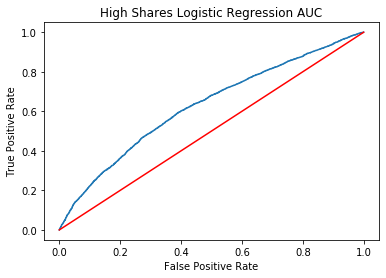

In [59]:
#regular logistic regression for level of article shares

#fitting model on training data
sharesLogReg=LogisticRegression(solver='lbfgs', max_iter=1000)
sharesLogReg.fit(x_train, y_train)

#predicting probabilities and only keeping the positive ones
probs=sharesLogReg.predict_proba(x_test)
probs=probs[:, 1]

#calculating ROC curve
nfpr, ntpr, thresholds = roc_curve(y_test, probs)

#plotting ROC curve
xgrid = np.linspace(0,1,100) 
plt.plot(nfpr,ntpr)
plt.plot(xgrid,xgrid,'red')
plt.title('High Shares Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('high_shares_classification.png')

#Finding area under the curve
AUC = roc_auc_score(y_test,probs)
print(AUC)

## Bayesian Logistic Regression for Is Business <a name='blrb'></a>

In [60]:
#IS BUSINESS

target = [' data_channel_is_bus']
n = len(onp['category'])
onp['x0'] = np.ones(n)
predictors = ['x0',' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', 
              ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], onp[target],
                        test_size=0.30, random_state=1)
n,p = x_train.shape

#finding the betas
n,p = x_train.shape
m0 = np.zeros(p)
S0 = x_train.T.dot(x_train)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,x_train, y_train[' data_channel_is_bus'],
                                                  m0,S0,maxiter,tolerance)

#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = predictors
results = pd.DataFrame(results,columns = col,index=ind)
results

iteration  1  Negative Log Posterior  19234.83426053852  AbDiff  1
iteration  2  Negative Log Posterior  11842.34863258478  AbDiff  7392.485627953738
iteration  3  Negative Log Posterior  11351.880096234094  AbDiff  490.4685363506869
iteration  4  Negative Log Posterior  11251.535033968548  AbDiff  100.3450622655455
iteration  5  Negative Log Posterior  11241.407061368662  AbDiff  10.127972599886562
iteration  6  Negative Log Posterior  11241.255105940902  AbDiff  0.15195542776018556
iteration  7  Negative Log Posterior  11241.255062058091  AbDiff  4.3882810132345185e-05


,post mean,post se,lower 95% bound,upper 95% bound
x0,-1.103383e+00,0.110846,-1.320642,-0.886125
shares,-5.579262e-07,0.000002,-0.000004,0.000003
n_tokens_title,-2.037201e-02,0.008088,-0.036225,-0.004519
n_tokens_content,5.400789e-04,0.000043,0.000456,0.000624
num_hrefs,-1.011004e-02,0.002191,-0.014405,-0.005815
num_imgs,-1.334370e-01,0.005512,-0.144241,-0.122633
num_videos,-9.173038e-02,0.007976,-0.107364,-0.076097
global_subjectivity,-9.249735e-01,0.170536,-1.259224,-0.590723
global_sentiment_polarity,3.035608e+00,0.206684,2.630507,3.440710
title_subjectivity,-2.889194e-01,0.058771,-0.404111,-0.173728


2                       0.0
3                       0.0
8                       0.0
11                      0.0
19                      0.0
21                      0.0
22                      0.0
23                      0.0
24                      0.0
25                      0.0
33                      0.0
36                      0.0
37                      0.0
38                      0.0
40                      0.0
44                      0.0
45                      0.0
54                      0.0
56                      0.0
57                      0.0
65                      0.0
66                      0.0
67                      0.0
69                      0.0
72                      0.0
74                      0.0
84                      0.0
85                      0.0
88                      0.0
92                      0.0
                       ... 
39546                   0.0
39548                   0.0
39551                   0.0
39552                   0.0
39557               

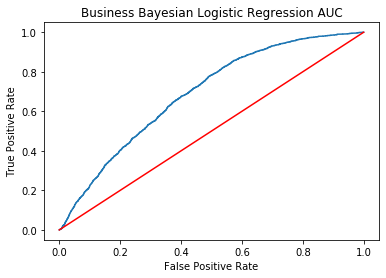

In [27]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xt = x_test.values[0,]
#print(np.mean(Xt.dot(betas.T)))
Xbetas = x_test.dot(betas.T)
test = np.mean(Xbetas, axis=1)
#test.head()

#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)

#Evaluate predictive performance of Bayesian Logistic Regression
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test)/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Business Bayesian Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_business_bclassification.png')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

## Logistic Regression for Is Business <a name='lrb'></a>

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6585990562585627


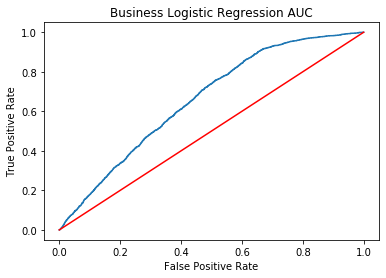

In [61]:
#regular logistic regression for business

#fitting model on training data
sharesLogReg=LogisticRegression(solver='lbfgs', max_iter=1000)
sharesLogReg.fit(x_train, y_train)

#predicting probabilities and only keeping the positive ones
probs=sharesLogReg.predict_proba(x_test)
probs=probs[:, 1]

#calculating ROC curve
nfpr, ntpr, thresholds = roc_curve(y_test, probs)

#plotting ROC curve
xgrid = np.linspace(0,1,100) 
plt.plot(nfpr,ntpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Business Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_business_classification.png')

#Finding area under the curve
AUC = roc_auc_score(y_test,probs)
print(AUC)

## Bayesian Logistic Regression for Is Weekend <a name='blrw'></a>

In [29]:
##bayesian logistic regression for publication on the weekend

target = [' is_weekend']
n = len(onp[' is_weekend'])
onp['x0'] = np.ones(n)
predictors = ['x0',' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', 
              ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], onp[target],
                        test_size=0.30, random_state=1)
n,p = x_train.shape

In [30]:
#finding the betas
n,p = x_train.shape
m0 = np.zeros(p)
S0 = x_train.T.dot(x_train)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,x_train, y_train[' is_weekend'],
                                                  m0,S0,maxiter,tolerance)


iteration  1  Negative Log Posterior  19234.83426053852  AbDiff  1
iteration  2  Negative Log Posterior  10995.15684668026  AbDiff  8239.677413858259
iteration  3  Negative Log Posterior  10666.998466017818  AbDiff  328.15838066244214
iteration  4  Negative Log Posterior  10660.425846532497  AbDiff  6.572619485321411
iteration  5  Negative Log Posterior  10660.419763537448  AbDiff  0.006082995048927842


In [16]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['x0',' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', 
    ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
results = pd.DataFrame(results,columns = col,index=ind)
results

,post mean,post se,lower 95% bound,upper 95% bound
x0,-2.185669,0.119086,-2.419077e+00,-1.952262
shares,0.000003,0.000001,7.634410e-07,0.000005
n_tokens_title,-0.008377,0.008568,-2.516994e-02,0.008417
n_tokens_content,0.000114,0.000039,3.664410e-05,0.000191
num_hrefs,0.010685,0.001535,7.676331e-03,0.013693
num_imgs,0.006839,0.002114,2.694799e-03,0.010982
num_videos,-0.019565,0.005091,-2.954394e-02,-0.009586
global_subjectivity,0.119008,0.175709,-2.253821e-01,0.463397
global_sentiment_polarity,0.477660,0.203781,7.824975e-02,0.877071
title_subjectivity,0.143381,0.057381,3.091522e-02,0.255847


In [17]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xt = x_test.values[0,]
#print(np.mean(Xt.dot(betas.T)))
Xbetas = x_test.dot(betas.T)
test = np.mean(Xbetas, axis=1)
test.head()

#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)

2              0.0
3              0.0
8              0.0
11             0.0
19             0.0
21             0.0
22             0.0
23             0.0
24             0.0
25             0.0
33             0.0
36             0.0
37             0.0
38             0.0
40             0.0
44             0.0
45             0.0
54             0.0
56             0.0
57             0.0
65             0.0
66             0.0
67             0.0
69             0.0
72             0.0
74             0.0
84             0.0
85             0.0
88             0.0
92             0.0
              ... 
39546          0.0
39548          0.0
39551          0.0
39552          0.0
39557          0.0
39558          0.0
39561          0.0
39562          0.0
39565          0.0
39569          0.0
39571          0.0
39584          0.0
39585          0.0
39588          0.0
39589          0.0
39591          0.0
39592          0.0
39593          0.0
39603          0.0
39607          0.0
39616          0.0
39622       

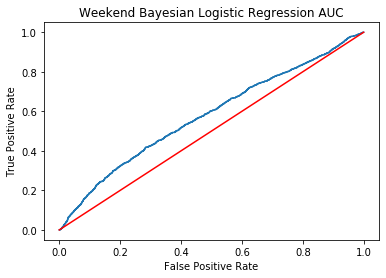

In [18]:
#Evaluate predictive performance of Bayesian Logistic Regression
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test)/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Weekend Bayesian Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_weekend_bclassification.png')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

In [ ]:
#Not the best fit

## Logistic Regression for Is Weekend <a name='lrw'></a>

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.519923007504277


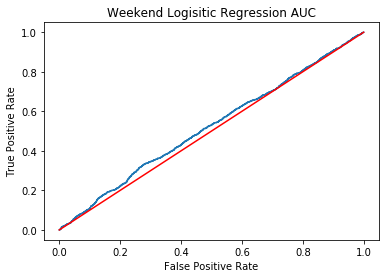

In [19]:
#regular logistic regression for is weekend

#fitting model on training data
sharesLogReg=LogisticRegression(solver='lbfgs')
sharesLogReg.fit(x_train, y_train)

#predicting probabilities and only keeping the positive ones
probs=sharesLogReg.predict_proba(x_test)
probs=probs[:, 1]

#calculating ROC curve
nfpr, ntpr, thresholds = roc_curve(y_test, probs)

#plotting ROC curve
xgrid = np.linspace(0,1,100) 
plt.plot(nfpr,ntpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Weekend Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_weekend_classification.png')

#Finding area under the curve
AUC = roc_auc_score(y_test,probs)
print(AUC)

## Bayesian Logistic Regression for Is Entertainment <a name='blre'></a>

In [62]:

#now Bayesian logistic regression for type of article 
target = [' data_channel_is_entertainment']
n = len(onp[target])
onp['x0'] = np.ones(n)
predictors = ['x0',' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', 
              ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
x_train, x_test, y_train, y_test = train_test_split(onp[predictors], onp[target],
                        test_size=0.30, random_state=1)
n,p = x_train.shape

#finding the betas
n,p = x_train.shape
m0 = np.zeros(p)
S0 = x_train.T.dot(x_train)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,x_train, y_train[' data_channel_is_entertainment'],
                                                  m0,S0,maxiter,tolerance)

#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['x0',' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', 
    ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' title_sentiment_polarity']
results = pd.DataFrame(results,columns = col,index=ind)
results

iteration  1  Negative Log Posterior  19234.83426053852  AbDiff  1
iteration  2  Negative Log Posterior  12530.118054453202  AbDiff  6704.716206085317
iteration  3  Negative Log Posterior  12274.80518375016  AbDiff  255.31287070304097
iteration  4  Negative Log Posterior  12268.728070237043  AbDiff  6.077113513118093
iteration  5  Negative Log Posterior  12268.713036744826  AbDiff  0.015033492216389277


,post mean,post se,lower 95% bound,upper 95% bound
x0,-3.725488,0.109968,-3.941024,-3.509952
shares,-0.000011,0.000003,-0.000016,-0.000005
n_tokens_title,0.159579,0.007773,0.144344,0.174814
n_tokens_content,0.000106,0.000037,0.000033,0.000179
num_hrefs,-0.018519,0.001792,-0.022031,-0.015007
num_imgs,0.035289,0.001965,0.031438,0.039139
num_videos,0.076046,0.003533,0.069121,0.082970
global_subjectivity,0.946038,0.152835,0.646481,1.245594
global_sentiment_polarity,-0.860338,0.181352,-1.215788,-0.504888
title_subjectivity,0.209412,0.050893,0.109662,0.309161


2                                 0.0
3                                 0.0
8                                 0.0
11                                0.0
19                                0.0
21                                0.0
22                                0.0
23                                0.0
24                                0.0
25                                0.0
33                                0.0
36                                0.0
37                                0.0
38                                0.0
40                                0.0
44                                0.0
45                                0.0
54                                0.0
56                                0.0
57                                0.0
65                                0.0
66                                0.0
67                                0.0
69                                0.0
72                                0.0
74                                0.0
84          

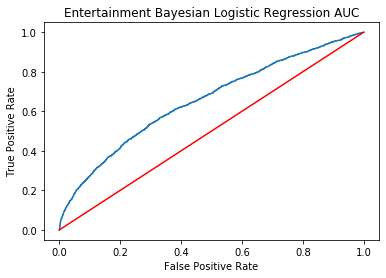

In [21]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xt = x_test.values[0,]
#print(np.mean(Xt.dot(betas.T)))
Xbetas = x_test.dot(betas.T)
test = np.mean(Xbetas, axis=1)
test.head()

#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)

#Evaluate predictive performance of Bayesian Logistic Regression
pred_class_blr = (pred_probs_blr > .5)
AccRate = np.sum(pred_class_blr==y_test)/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Entertainment Bayesian Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_entertainment_bclassification.png')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

## Logistic Regression for Is Entertainment <a name='lre'></a>

/Users/carolinemcdonald/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5447658199049158


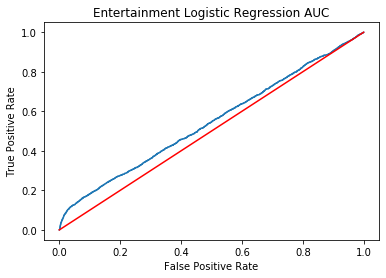

In [63]:
#regular logistic regression for is entertainment

#fitting model on training data
sharesLogReg=LogisticRegression(solver='lbfgs', max_iter=1000)
sharesLogReg.fit(x_train, y_train)

#predicting probabilities and only keeping the positive ones
probs=sharesLogReg.predict_proba(x_test)
probs=probs[:, 1]

#calculating ROC curve
nfpr, ntpr, thresholds = roc_curve(y_test, probs)

#plotting ROC curve
xgrid = np.linspace(0,1,100) 
plt.plot(nfpr,ntpr)
plt.plot(xgrid,xgrid,'red')
plt.title('Entertainment Logistic Regression AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('is_entertainment_classification.png')

#Finding area under the curve
AUC = roc_auc_score(y_test,probs)
print(AUC)

# References <a name='ref'></a>

1. R. Jordan Crouser. "Ridge Regression and the Lasso". Smith College, 2016. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html <a name='r1'></a>